# <center>Telco inc Churn Problem Addressed</center>

### Importing the necessary libraries

In [16]:
#plot decision tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_tree

%matplotlib inline

### Reading the collected training dataset of their past customers

In [17]:
#load data
dataset = pd.read_csv('training.csv')
dataset.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERAGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,one,98.950525,39541.0,67,50,264285,True,2,2,188.0,331,5,1.2,1,avg,very_high,considering,LEAVE
1,C100001,zero,153.314917,29272.0,164,46,839238,False,2,3,123.0,247,18,2.7,2,very_sat,very_high,no,STAY
2,C100006,one,480.000000,26741.5,0,12,434476,True,0,4,104.0,361,0,2.6,4,very_unsat,very_little,actively_looking_into_it,STAY
3,C100007,one,288.461538,80548.5,160,0,286499,True,3,2,195.0,622,19,1.5,10,very_sat,very_little,actively_looking_into_it,LEAVE
4,C100008,zero,132.352941,32202.0,0,24,269768,True,2,2,108.0,345,1,2.5,5,unsat,little,considering,STAY


### Ploting the Dataset of churn data
- As observed from the below chart there are almost 50% of churn customers

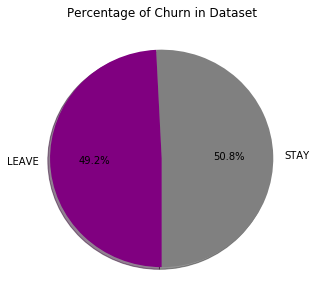

In [18]:
# Data to plot
from matplotlib.pylab import rcParams

sizes = dataset.CHURNED.value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['STAY', 'LEAVE'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
CUSTOMER_ID                    15000 non-null object
COLLEGE                        15000 non-null object
DATA                           15000 non-null float64
INCOME                         15000 non-null float64
OVERAGE                        15000 non-null int64
LEFTOVER                       15000 non-null int64
HOUSE                          15000 non-null int64
LESSTHAN600k                   15000 non-null bool
CHILD                          15000 non-null int64
JOB_CLASS                      15000 non-null int64
REVENUE                        15000 non-null float64
HANDSET_PRICE                  15000 non-null int64
OVER_15MINS_CALLS_PER_MONTH    15000 non-null int64
TIME_CLIENT                    15000 non-null float64
AVERAGE_CALL_DURATION          15000 non-null int64
REPORTED_SATISFACTION          15000 non-null object
REPORTED_USAGE_LEVEL           15000 non-null obj

### Data Cleansing
- Deleting irrelevant data like CUSTOMER_ID from the dataset as it holds no importance in our predictions
- Converting object data to numerical

In [20]:
dataset.drop('CUSTOMER_ID', inplace=True, axis=1)

dataset.COLLEGE = dataset.COLLEGE.astype('category').cat.codes.values
dataset.LESSTHAN600k = dataset.LESSTHAN600k.astype('category').cat.codes.values
dataset.REPORTED_SATISFACTION = dataset.REPORTED_SATISFACTION.astype('category').cat.codes.values
dataset.REPORTED_USAGE_LEVEL = dataset.REPORTED_USAGE_LEVEL.astype('category').cat.codes.values
dataset.CONSIDERING_CHANGE_OF_PLAN = dataset.CONSIDERING_CHANGE_OF_PLAN.astype('category').cat.codes.values
dataset.CHURNED = dataset.CHURNED.astype('category').cat.codes.values

### Training the model using Boosting algorithm
One of the key purposes of churn prediction is to find out what factors increase churn risk. Tree-based machine learning models, including the boosting model make it easy to visualize feature importance. 
- Separate the independent(X) and dependent(y) variables from the dataset
- Split the dataset into training and test data
- Features in the dataset are measured using different units so scale the features using MinMaxScaler
- Train the model using xgboost and plot tree

In [21]:
#Split X and Y
X = dataset.drop(labels=['CHURNED'], axis=1)
y = dataset.CHURNED.astype(int)

X.shape, y.shape

((15000, 17), (15000,))

In [22]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

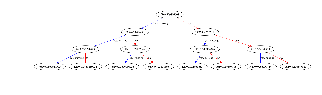

In [23]:
#Fit model no training data
model = XGBClassifier()
model.fit(X, y)

#plot single tree
plot_tree(model)
plt.show()

## Find Accuracy and ROC AUC
- Split dataset into train and test data
- Train the model using XGBClassifier
- find predicted y values for the X data
- evaluate predictions by finding the accuracy score of the actual and predicted values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [25]:
#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)
y_pred_list = list(np.asarray(y_pred)[:, 1])
predictions = [np.round(value) for value in y_pred_list]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.93%


## Measure the performance using AUROC

As observed ROC AUC is around 0.8, it means there is 80% chance that the model will be able to distinguish 
between positive class and negative class.

In [26]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_list)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC ", roc_auc)

ROC AUC  0.8317805938169573


### Find the correlation between the features using correlation matrix
From the below correlation matrix
- There is no features with high correlation 
- OVER_15MINS_CALLS_PER_MONTH and OVERAGE have Medium correlation
- HANDSET_PRICE and INCOME have low correlation

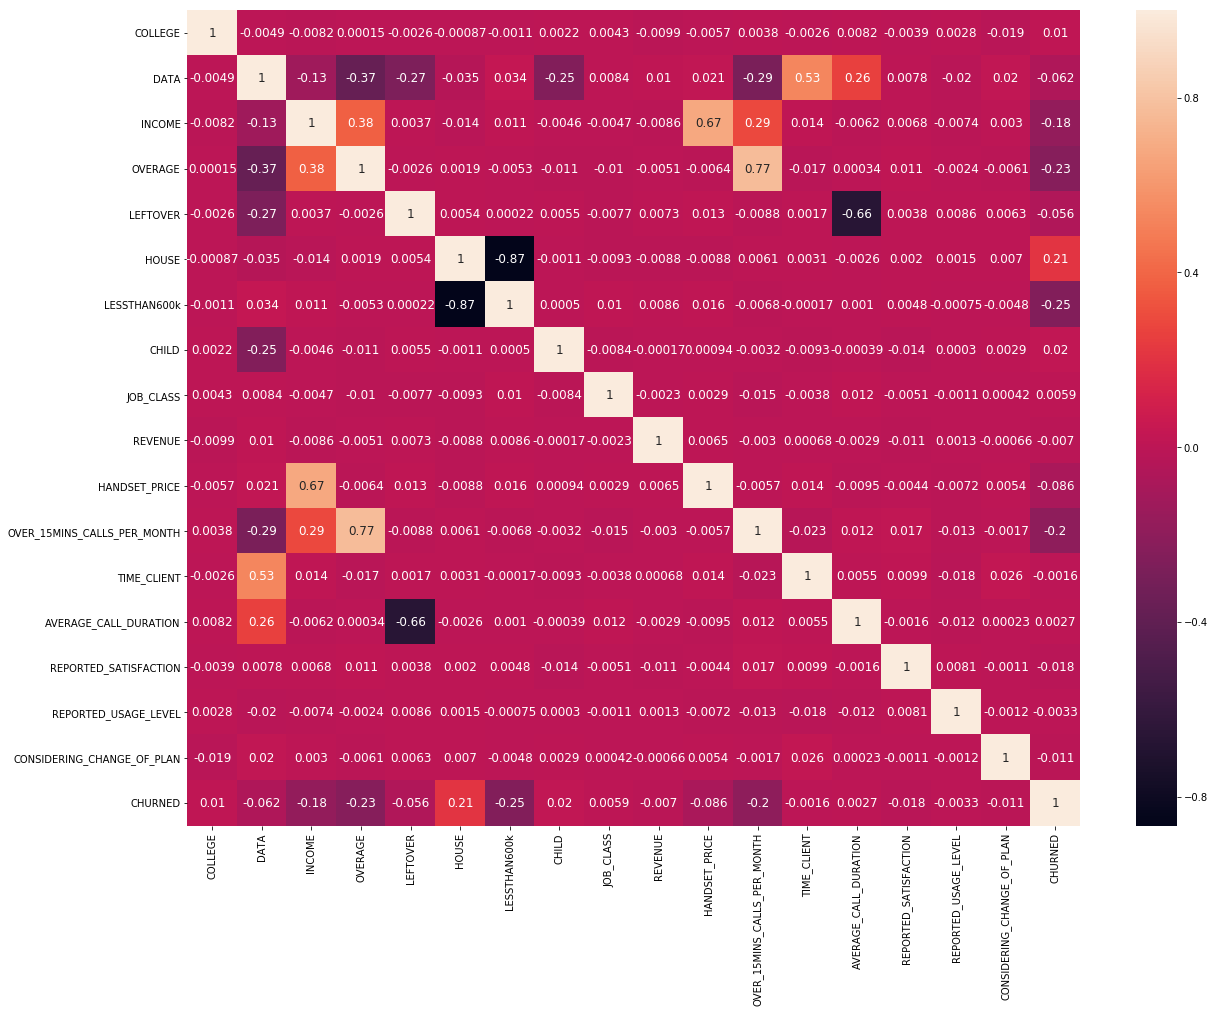

In [27]:
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Predict churn values for test data
- Read test dataset
- clean the dataset
- scale the features

In [28]:
# use the test data
dataset_test = pd.read_csv('validation.csv')
dataset_test.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERAGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,C100002,one,35.156250,45855.0,204,72,602885,False,3,3,147.0,224,18,2.2,2,very_unsat,little,actively_looking_into_it
1,C100003,zero,582.857143,29720.5,75,41,675856,False,1,2,127.0,185,3,2.4,1,unsat,high,actively_looking_into_it
2,C100004,one,419.491525,27988.0,26,11,183592,True,2,1,122.0,375,5,2.3,6,unsat,little,actively_looking_into_it
3,C100005,zero,380.000000,33461.5,0,20,210049,True,4,1,142.0,345,1,2.8,5,very_unsat,little,actively_looking_into_it
4,C100009,zero,314.917127,25409.0,52,21,164098,True,2,3,145.0,355,5,1.8,5,very_unsat,very_little,no


In [29]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
CUSTOMER_ID                    5000 non-null object
COLLEGE                        5000 non-null object
DATA                           5000 non-null float64
INCOME                         5000 non-null float64
OVERAGE                        5000 non-null int64
LEFTOVER                       5000 non-null int64
HOUSE                          5000 non-null int64
LESSTHAN600k                   5000 non-null bool
CHILD                          5000 non-null int64
JOB_CLASS                      5000 non-null int64
REVENUE                        5000 non-null float64
HANDSET_PRICE                  5000 non-null int64
OVER_15MINS_CALLS_PER_MONTH    5000 non-null int64
TIME_CLIENT                    5000 non-null float64
AVERAGE_CALL_DURATION          5000 non-null int64
REPORTED_SATISFACTION          5000 non-null object
REPORTED_USAGE_LEVEL           5000 non-null object
CONSIDERING_CHA

In [30]:
test_custormer_ids = dataset_test.CUSTOMER_ID.values
test_custormer_ids

array(['C100002', 'C100003', 'C100004', ..., 'C119988', 'C119994',
       'C119999'], dtype=object)

In [31]:
dataset_test.drop('CUSTOMER_ID', inplace=True, axis=1)

dataset_test.COLLEGE = dataset_test.COLLEGE.astype('category').cat.codes.values
dataset_test.LESSTHAN600k = dataset_test.LESSTHAN600k.astype('category').cat.codes.values
dataset_test.REPORTED_SATISFACTION = dataset_test.REPORTED_SATISFACTION.astype('category').cat.codes.values
dataset_test.REPORTED_USAGE_LEVEL = dataset_test.REPORTED_USAGE_LEVEL.astype('category').cat.codes.values
dataset_test.CONSIDERING_CHANGE_OF_PLAN = dataset_test.CONSIDERING_CHANGE_OF_PLAN.astype('category').cat.codes.values

dataset_test.head()

,COLLEGE,DATA,INCOME,OVERAGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,35.156250,45855.0,204,72,602885,0,3,3,147.0,224,18,2.2,2,4,2,0
1,1,582.857143,29720.5,75,41,675856,0,1,2,127.0,185,3,2.4,1,2,1,0
2,0,419.491525,27988.0,26,11,183592,1,2,1,122.0,375,5,2.3,6,2,2,0
3,1,380.000000,33461.5,0,20,210049,1,4,1,142.0,345,1,2.8,5,4,2,0
4,1,314.917127,25409.0,52,21,164098,1,2,3,145.0,355,5,1.8,5,4,4,3


In [32]:
X_test1 = dataset_test
X_test1.shape

(5000, 17)

In [33]:
#feature scaling for test data
scaler_test = MinMaxScaler()
scaler_test.fit(X_test1)
X_test1 = scaler_test.transform(X_test1)

### Use the trained model to predict churn value for test dataset
- get the predicted churn values of test dataset
- get the churn probability values
- get the customer ids in the test dataset
- check if the customers need to be contacted
- find the customers with higher revenue (paying high bills) to provide discounts in order to retain them

In [34]:
y_test_pred = model.predict(X_test1)
print(len(y_test_pred), '\n', y_test_pred)

y_test_prob = model.predict_proba(X_test1)
print(len(y_test_prob), '\n', y_test_prob)

5000 
 [1 1 1 ... 0 1 1]
5000 
 [[0.06951779 0.9304822 ]
 [0.31465626 0.68534374]
 [0.3746342  0.6253658 ]
 ...
 [0.9222455  0.07775448]
 [0.4612875  0.5387125 ]
 [0.09694958 0.9030504 ]]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
customer_ids = list(np.asarray(test_custormer_ids))
churn_labels = list(np.asarray(y_test_pred))
churn_prob = list(np.asarray(y_test_prob)[:, 1])

In [41]:
#Identify the top customers who are paying high revenue and maintaining the relationship with 
#them to ensure continuous revenue by providing them discount

df_revenue_filter = dataset_test.query('REVENUE >= 300')
discounts = []
for i in dataset_test.REVENUE.values:
    if(i >= 300):
        discounts.append('10%')
    else:
        discounts.append('0%')

In [42]:
#customers who need to be contacted - who have churn probability between 0.3 to 0.5 and 
#whose revenue is above or equal to 200

should_call = []
for i, j in zip(dataset_test.REVENUE.values, churn_prob):
    if(i >= 200 and (float(j) > 0.3 and float(j) < 0.5)):
        should_call.append('YES')
    else:
        should_call.append('NO')

### Create output csv file
- create output csv file
- add the columns like customer id, churned probability, churn label, client to contact and disount 
- add the collected data for the respective columns

In [43]:
outputFile = open('output_tree.csv', 'w')
new_values = {'CUSTOMER_ID': customer_ids, 'CHURNED_PROBABILITY': churn_prob,'CHURN_LABEL': churn_labels,
             'CLIENT_TO_CONTACT': should_call, 'DISCOUNT': discounts}
df = pd.DataFrame(new_values)
df.to_csv('output_tree.csv', index=False)

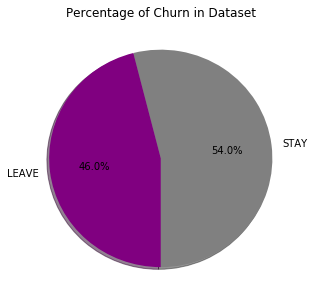

In [39]:
dataset_output = pd.read_csv('output_tree.csv')
# Data to plot
sizes = dataset_output.CHURN_LABEL.value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['STAY', 'LEAVE'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

### Conclusion
There are 46% of churn customers in the current data who are leaving. Following are the suggestion made based on the observations
 - Tenure in years can be planned such that customers with high tenure get discounts
 - Discounts can also be provided to customers who are paying high bills who are contributing to the companies revenue
 - Contacting the customers on a regular basis to maintain good customer relationship and get feedback on the service
   on a regular basis to improve the service

### References

- https://www.datascience.com/blog/churn-prediction-python
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5